In [13]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.options.display.max_rows = 4000
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('monthly_count.csv')

In [3]:
crime_M = df
crime_M.rename(columns={'CMPLNT_FR_DT': 'Month'}, inplace = True)
crime_M.set_index('Month', inplace = True)
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [4]:
diff = crime_M.Count.diff(periods=1)
crime_M['Count_diff'] = diff.diff(periods=12)

In [5]:
x_crime = pd.read_csv('final.csv')
x_crime.Month = pd.to_datetime(
    x_crime.Month, errors='coerce', infer_datetime_format = True)
x_crime.set_index('Month', inplace = True)

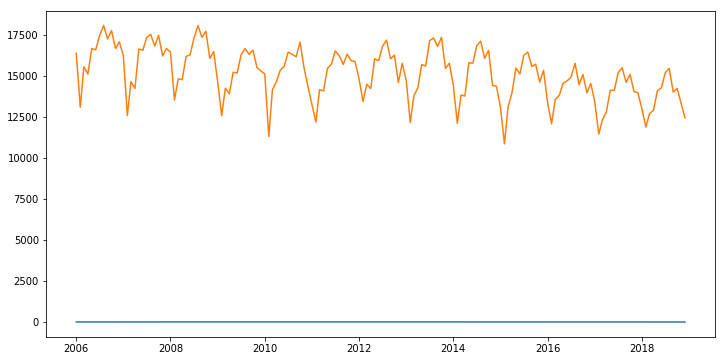

In [12]:
plt.figure(figsize=(12,6))
plt.plot(x_crime[['Unem_R', 'Count']])

In [145]:
for col in x_crime.columns:
    diff = x_crime[col].diff(periods=1)
    x_crime['{}_Diff'.format(col)] = diff.diff(periods=12)



In [14]:
standard_df = x_crime.copy()

In [20]:
scaler = StandardScaler()
standard_df = pd.DataFrame(scaler.fit_transform(standard_df), columns = x_crime.columns)


In [29]:
standard_df.columns

Index(['Count', 'Unem_R', 'Mean_Temp', 'Over70', 'Days'], dtype='object')

Text(0.5, 1.0, 'Unemployment Rate Plot')

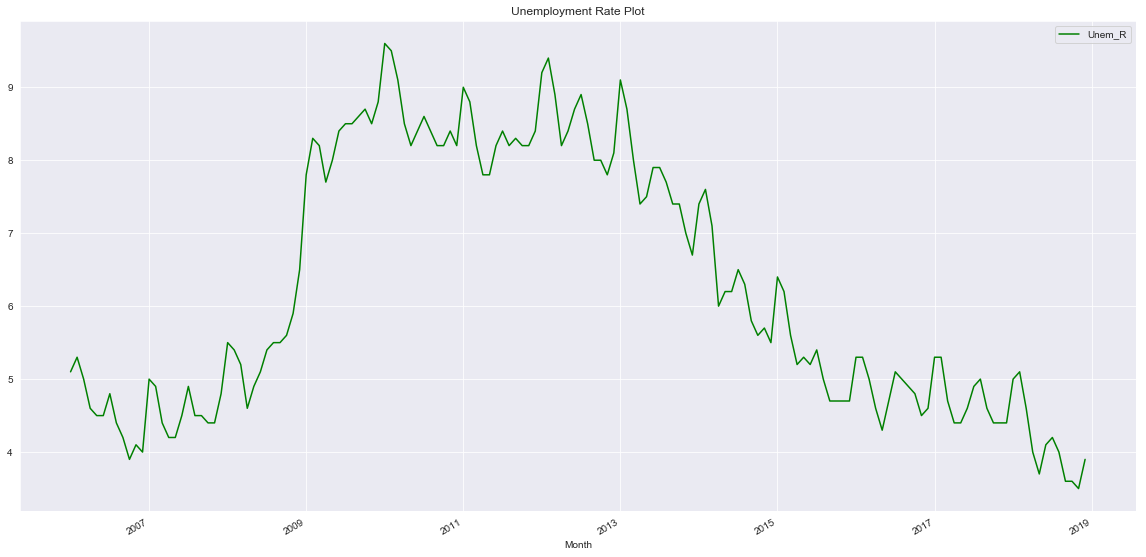

In [54]:
# plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
x_crime.Unem_R.plot(figsize = (20,10), subplots=True, legend=True, color='green')
plt.title('Unemployment Rate Plot')

In [26]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window, name = None):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(20, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    if name != None:
        plt.title('Rolling Mean & Standard Deviation for {}'.format(name))
    else:
        plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

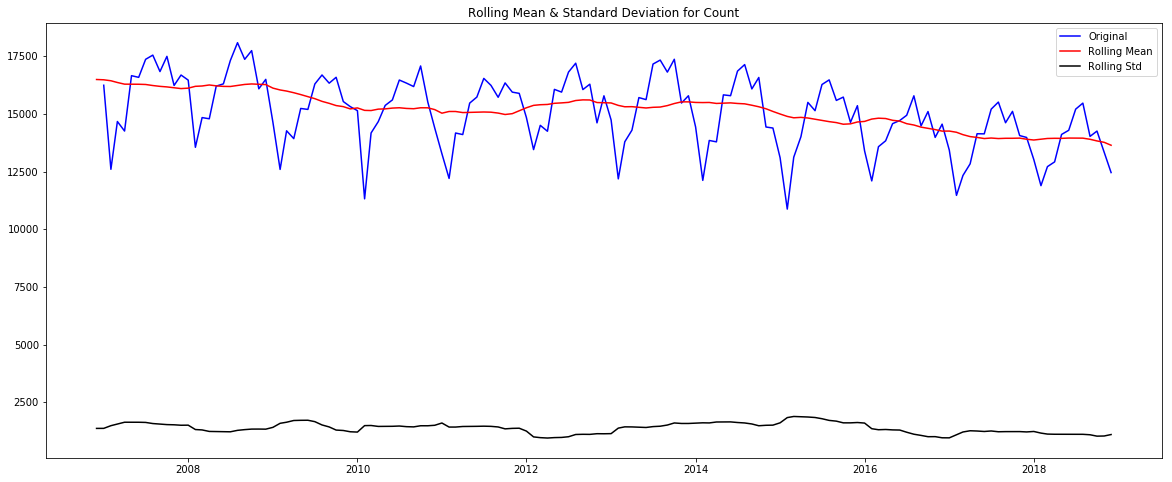

Results of Dickey-Fuller Test:
Test Statistic                  -0.437883
p-value                          0.903579
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


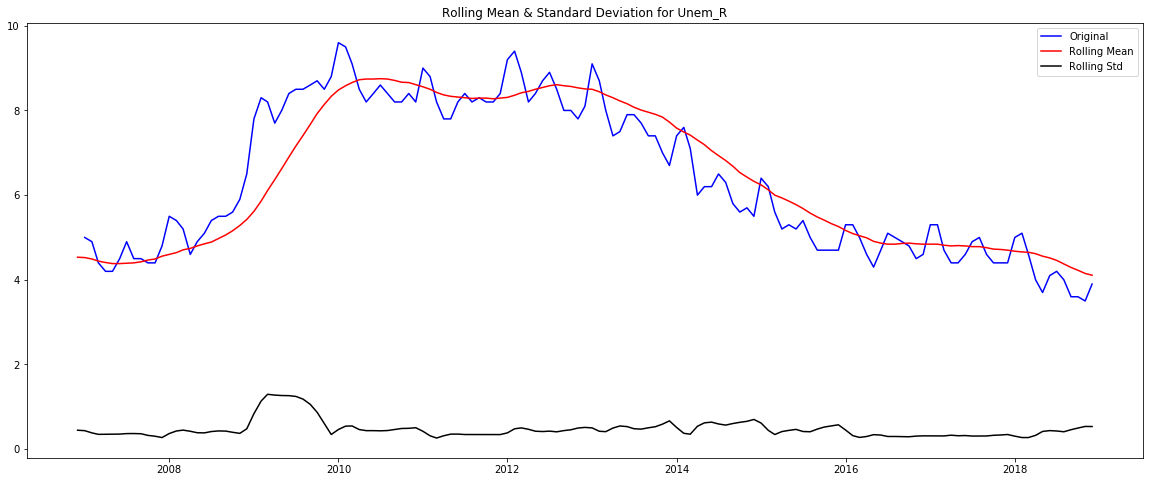

Results of Dickey-Fuller Test:
Test Statistic                  -2.081113
p-value                          0.252177
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


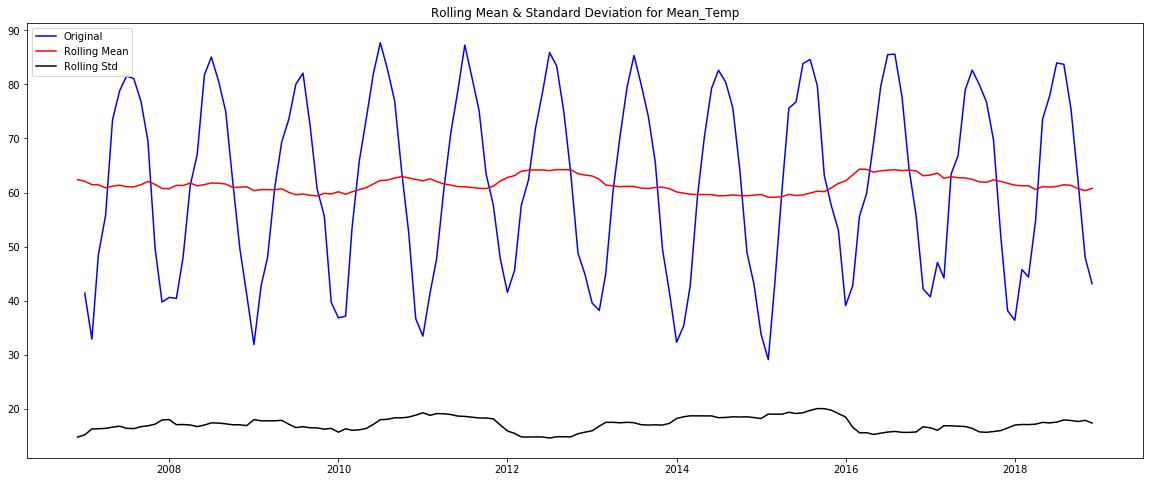

Results of Dickey-Fuller Test:
Test Statistic                  -2.587348
p-value                          0.095640
#Lags Used                      10.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


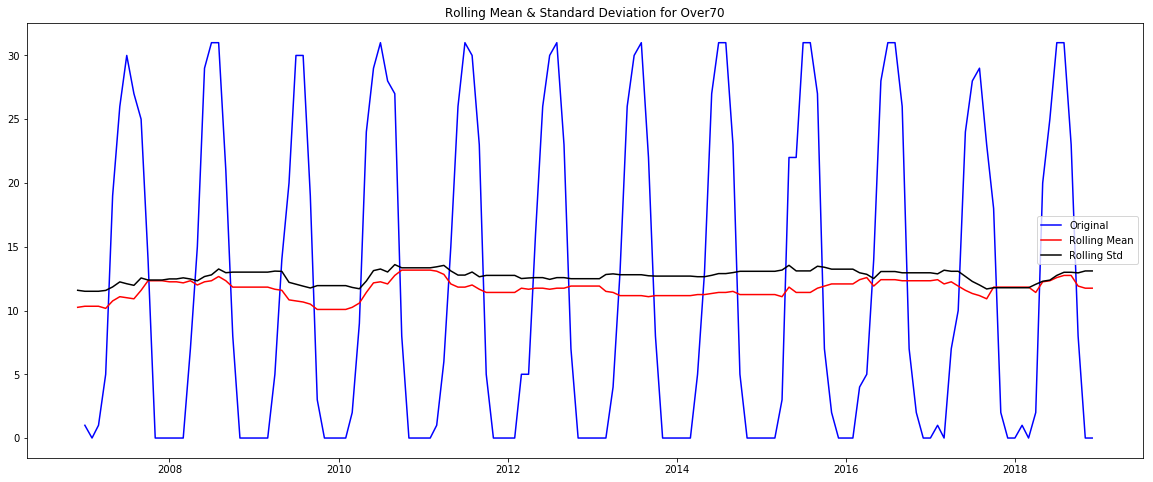

Results of Dickey-Fuller Test:
Test Statistic                  -3.694454
p-value                          0.004192
#Lags Used                      14.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


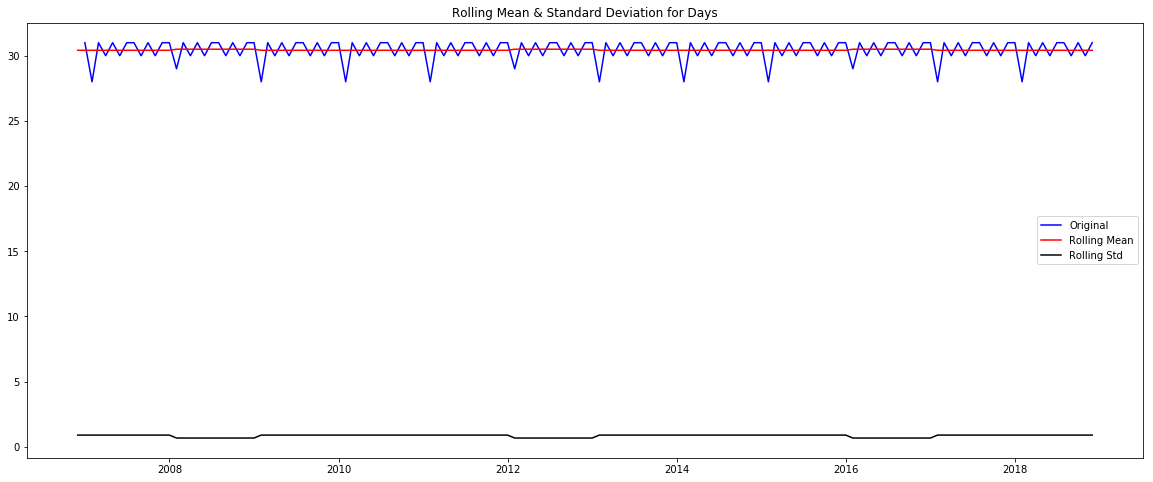

Results of Dickey-Fuller Test:
Test Statistic                  -2.809178
p-value                          0.056975
#Lags Used                      11.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


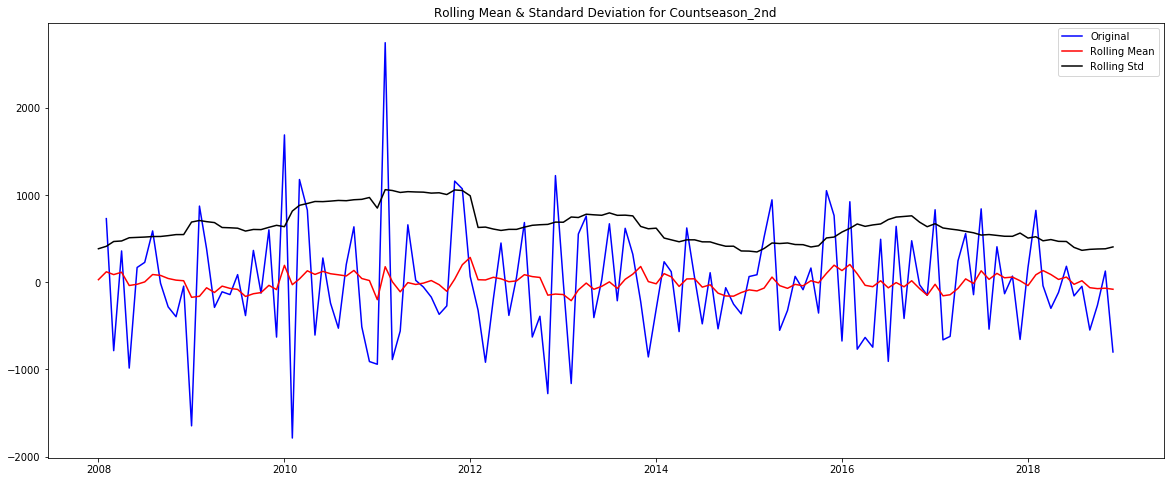

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


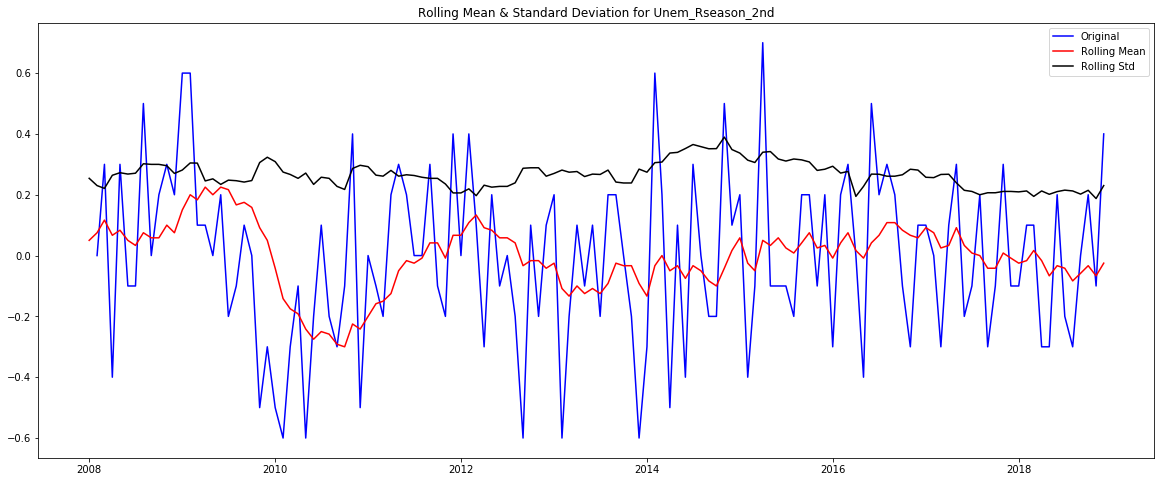

Results of Dickey-Fuller Test:
Test Statistic                  -4.513996
p-value                          0.000186
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


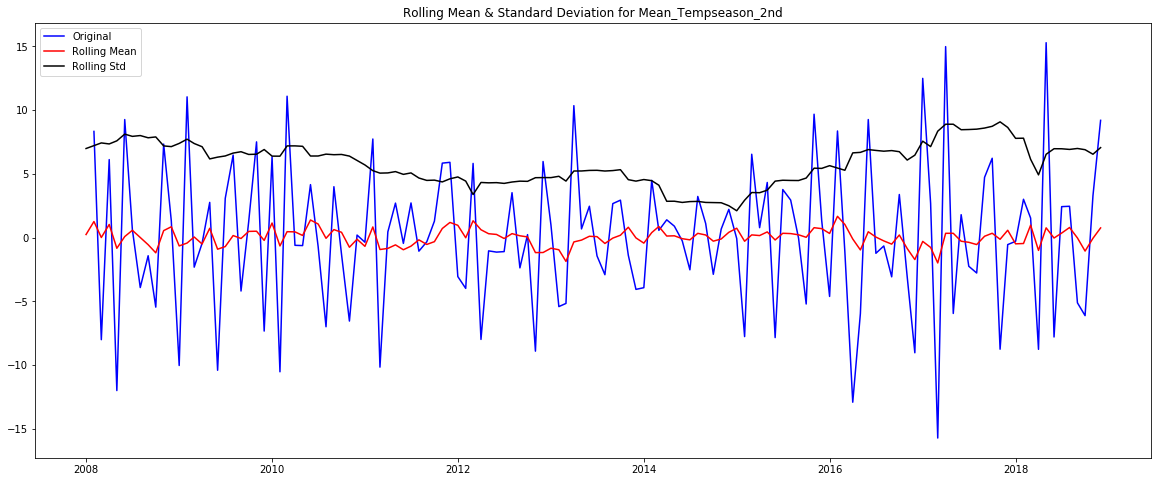

Results of Dickey-Fuller Test:
Test Statistic                  -5.032748
p-value                          0.000019
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


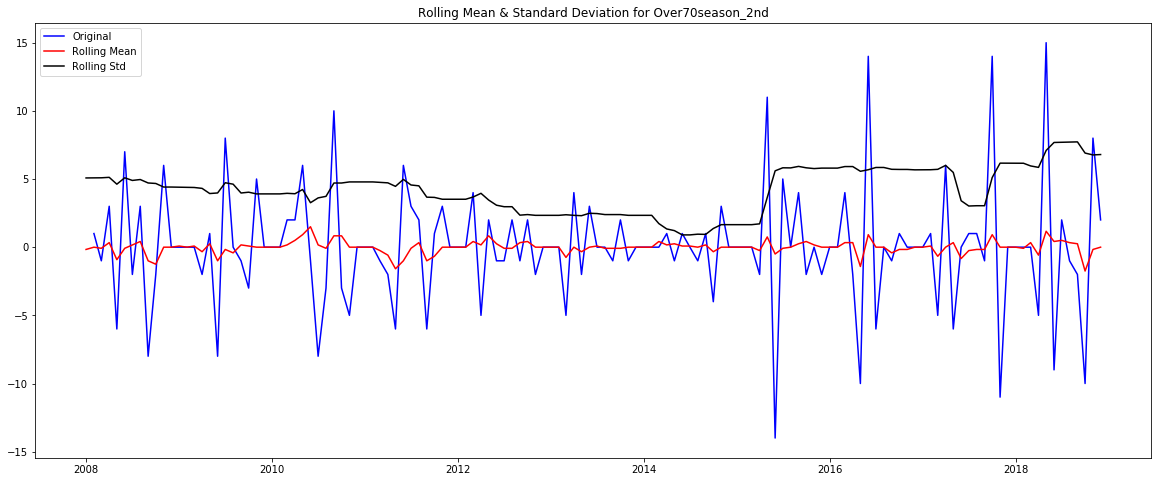

Results of Dickey-Fuller Test:
Test Statistic                -6.040288e+00
p-value                        1.351097e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


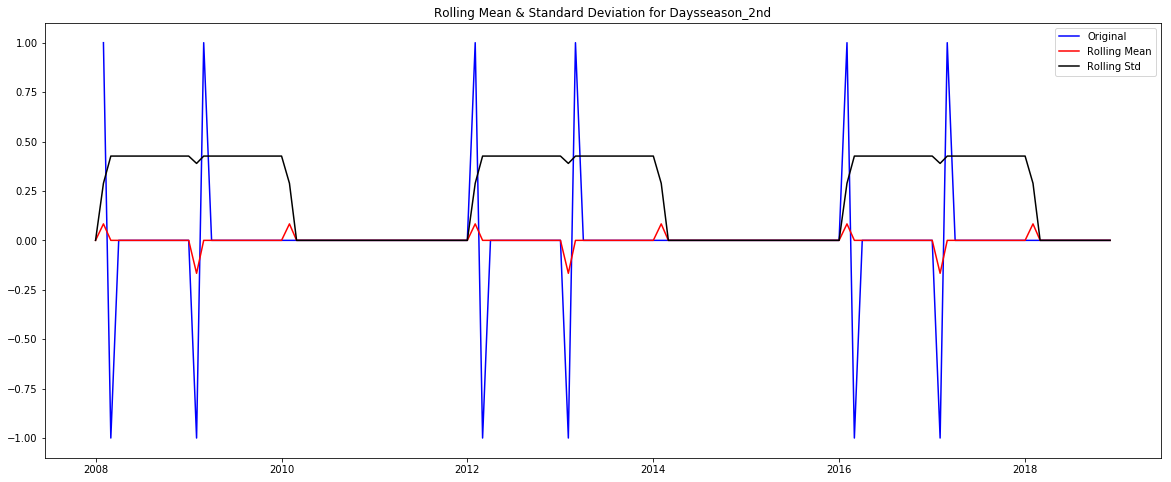

Results of Dickey-Fuller Test:
Test Statistic                  -5.093284
p-value                          0.000014
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [38]:
for col in x_crime.columns:
    test_stationarity(x_crime[col].dropna(), 12, col);

In [4]:
# crime_M = df.groupby(['CMPLNT_FR_DT'])['Count'].sum()

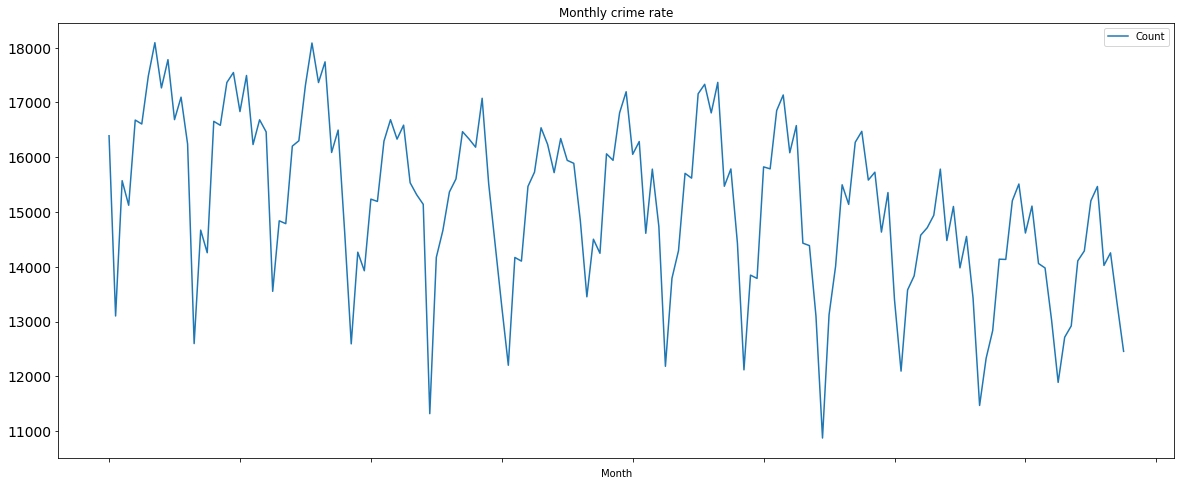

In [5]:
crime_M.plot(figsize=(20,8), title= 'Monthly crime rate', fontsize=14)

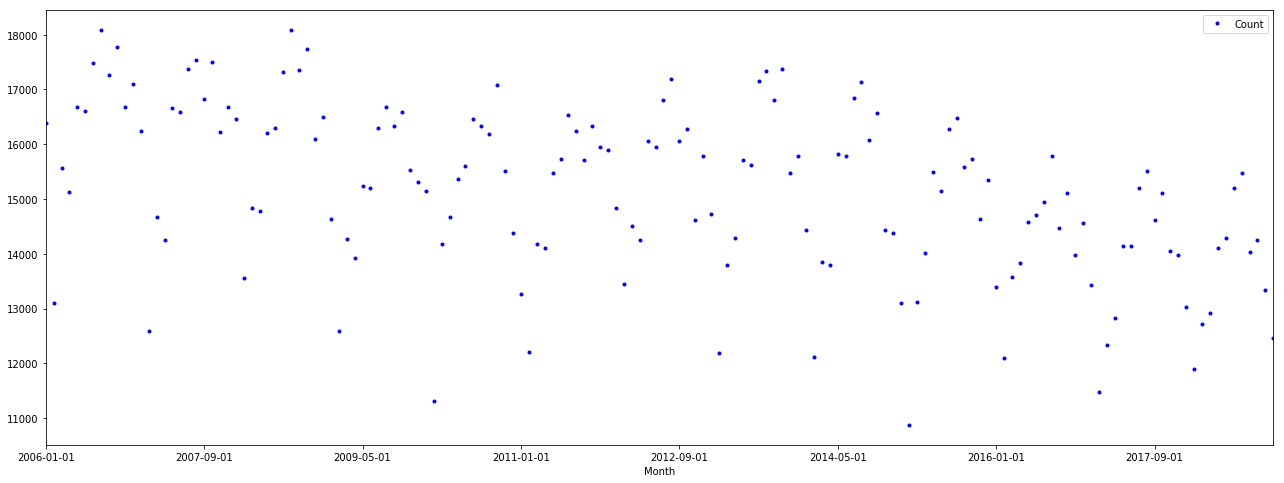

In [95]:
crime_M.plot(figsize = (22,8), style = 'b.')
plt.show()

<Figure size 432x288 with 0 Axes>

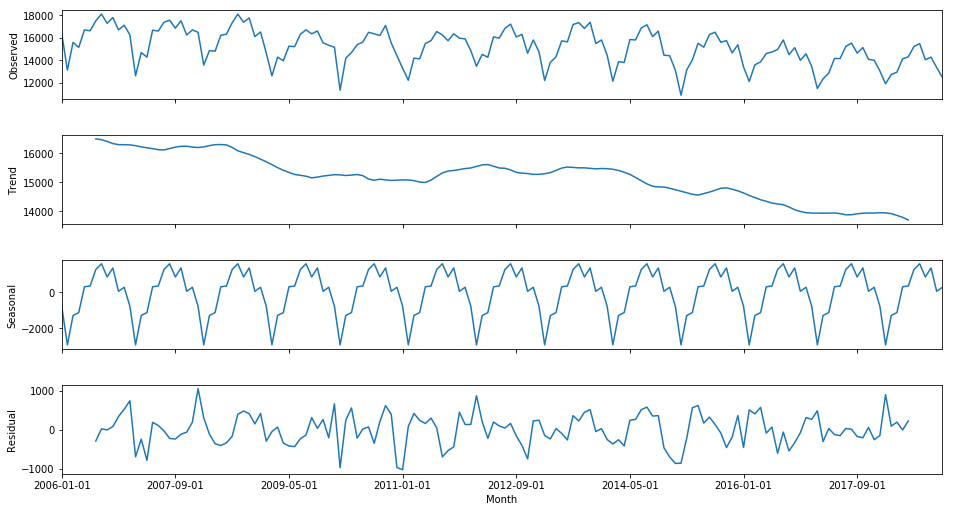

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(crime_M , freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

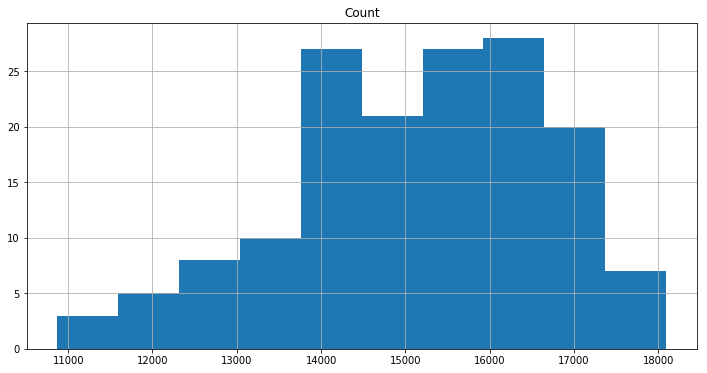

In [97]:
# Plot a histogram of the temperature dataset
crime_M.hist(figsize = (12,6))
plt.show()

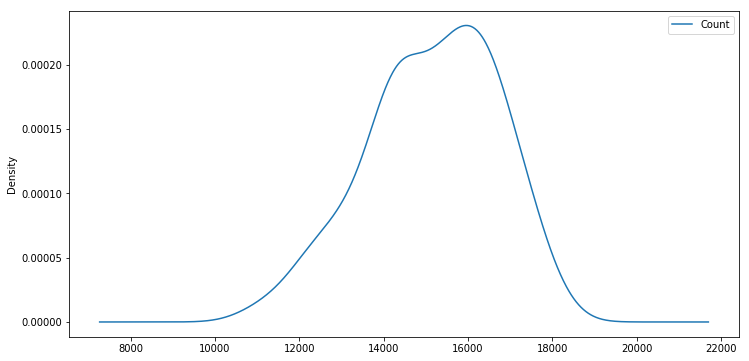

In [98]:
# Plot a density plot for temperature dataset
crime_M.plot(kind='kde', figsize = (12,6))
plt.show()

In [99]:
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [100]:
type(crime_M)

pandas.core.frame.DataFrame

In [124]:
crime_M.index = pd.to_datetime(
  crime_M.index, errors='coerce', infer_datetime_format = True)

In [125]:
crime_M.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', length=156, freq=None)

In [126]:
year_groups = crime_M.groupby(pd.Grouper(freq ='A'))
crime_annual = pd.DataFrame()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a9b0320>,
      dtype=object)

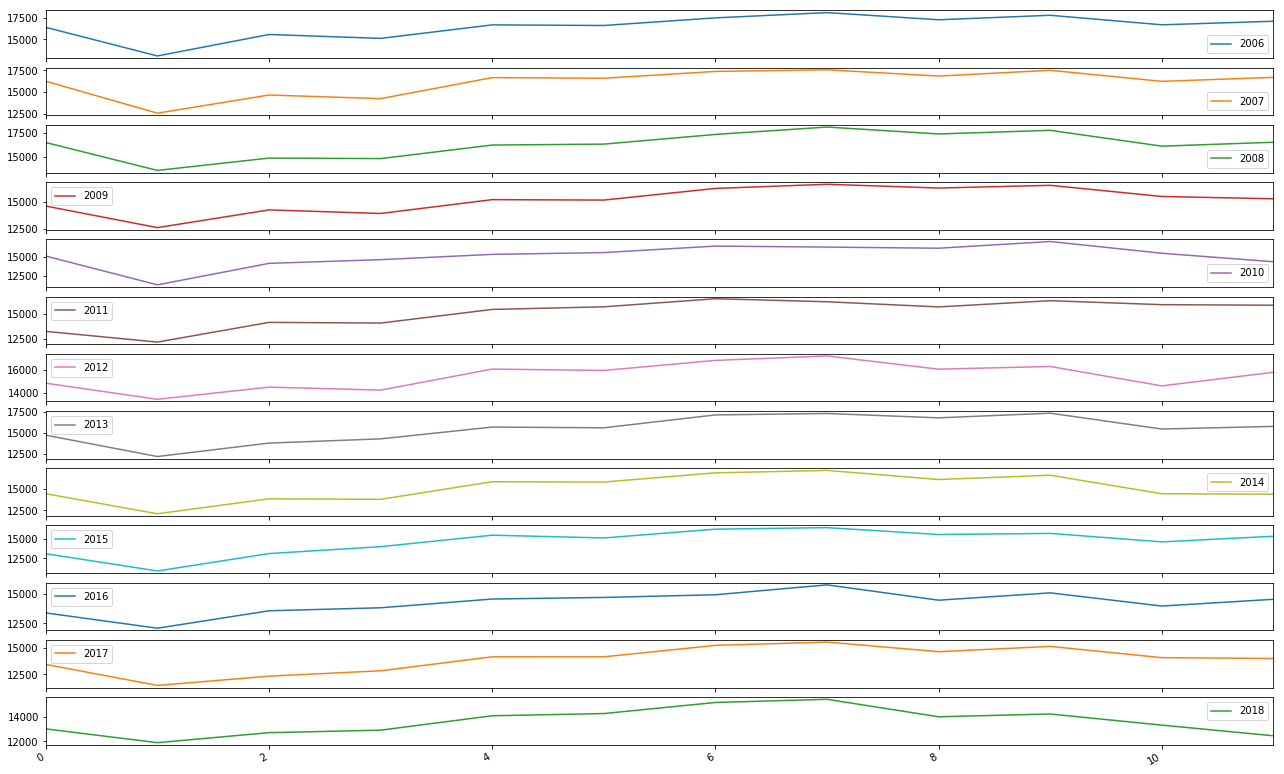

In [127]:
for yr, group in year_groups:
    crime_annual[yr.year] = group.values.ravel()
# Plot the yearly groups as subplots
crime_annual.plot(figsize = (22,15), subplots=True, legend=True)


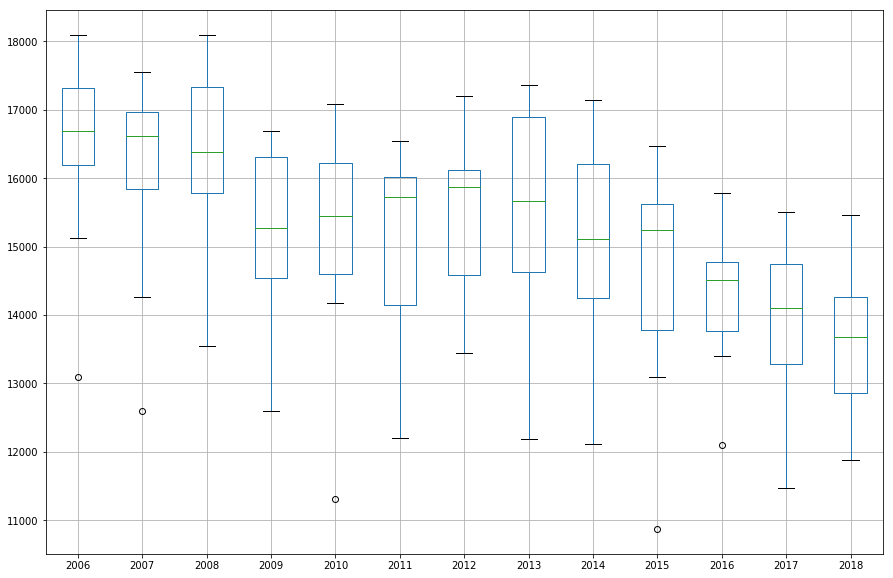

In [137]:
# Generate a box and whiskers plot for annual crime dataframe
crime_annual.boxplot(figsize = (15,10))
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

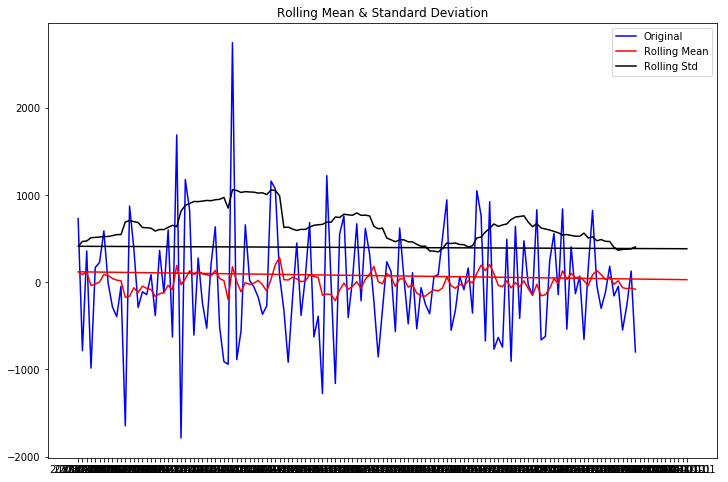

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [11]:
crime_M['first_diff'] = crime_M['Count'].diff(periods=1)
crime_M['first_diff_season'] = crime_M['first_diff'].diff(periods=12)

test_stationarity(crime_M['first_diff_season'].dropna(), 12)

In [12]:
crime_M['seasonal_diff'] = crime_M['Count'].diff(periods=12)
crime_M['seasonal_diff_first'] = crime_M['seasonal_diff'].diff(periods=1)

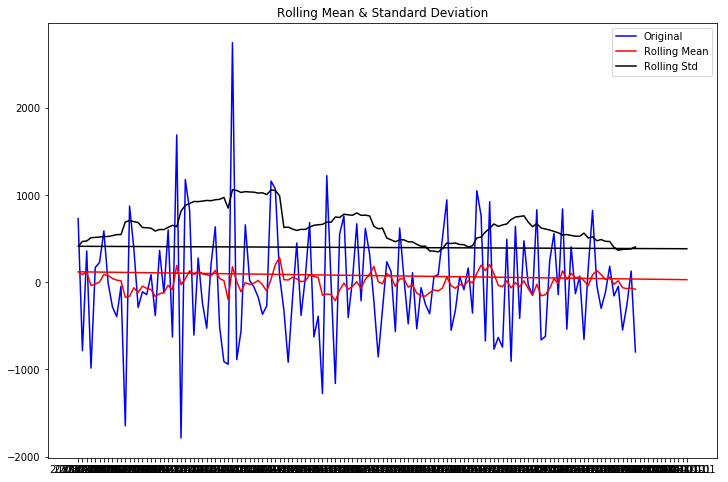

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [13]:
test_stationarity(crime_M['seasonal_diff_first'].dropna(), 12)

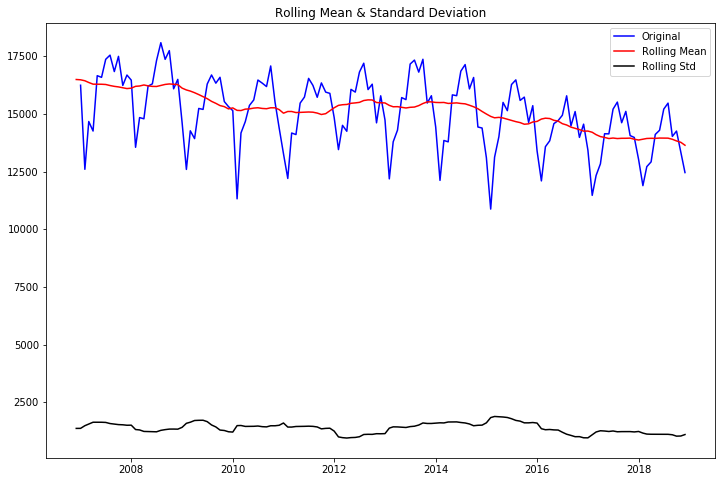

Results of Dickey-Fuller Test:
Test Statistic                  -0.437883
p-value                          0.903579
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [132]:
#test the stationarity of the untransformed dataset
test_stationarity(crime_M.Count, 12)

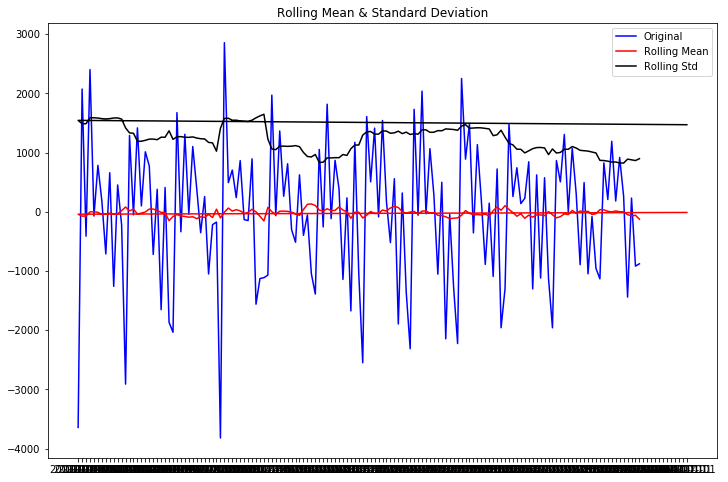

Results of Dickey-Fuller Test:
Test Statistic                -6.031277e+00
p-value                        1.416046e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64


In [133]:
#test the stationarity of the untransformed dataset
test_stationarity(crime_M_diff.Count, 12)

In [130]:
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


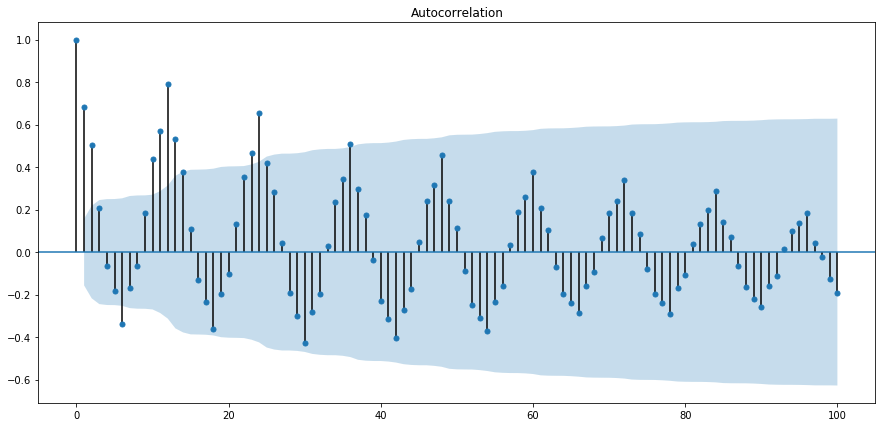

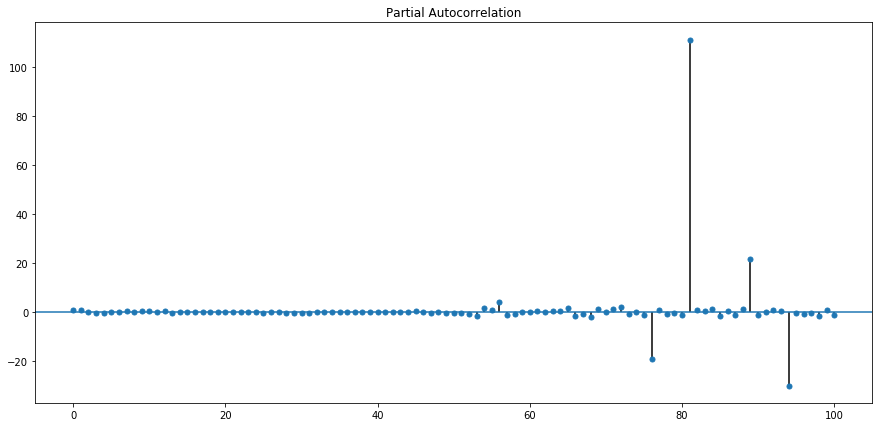

In [138]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams


fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M,ax=ax, lags=100);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M,ax=ax, lags=100);

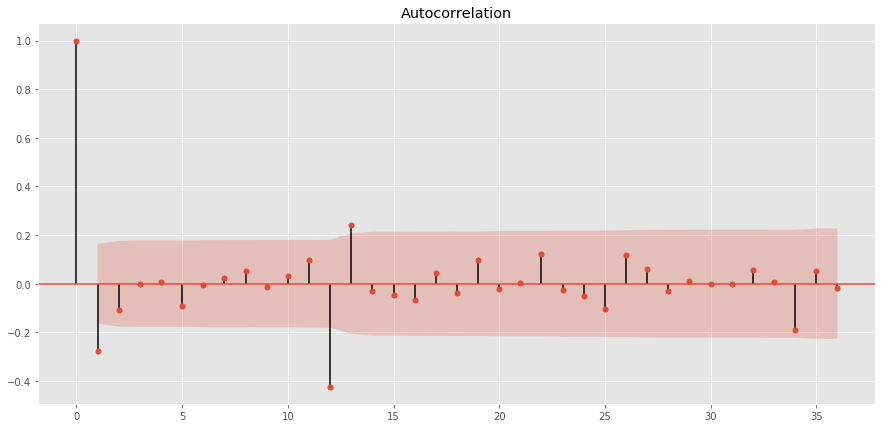

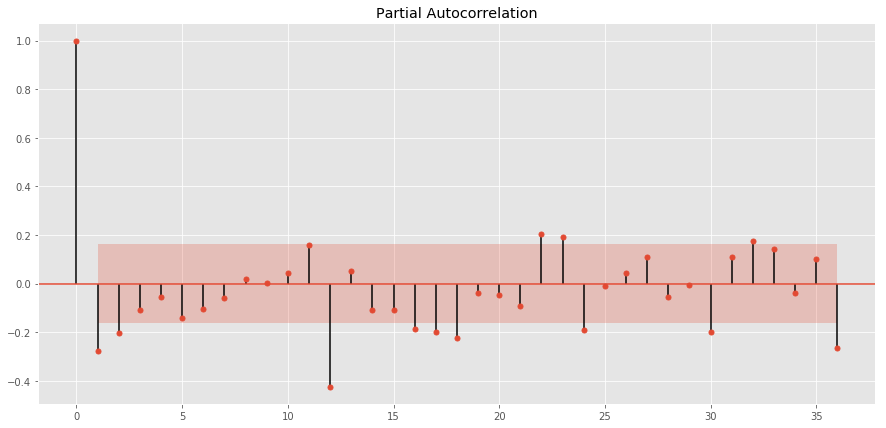

In [257]:
fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M.seasonal_diff_first.dropna(),ax=ax, lags=36);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M.seasonal_diff_first.dropna(),ax=ax, lags=36);

In [108]:
crime_M_diff= crime_M.diff().dropna()
crime_M_diff.head()

,Count
Month,
2006-02-01,-3291.0
2006-03-01,2471.0
2006-04-01,-449.0
2006-05-01,1556.0
2006-06-01,-72.0


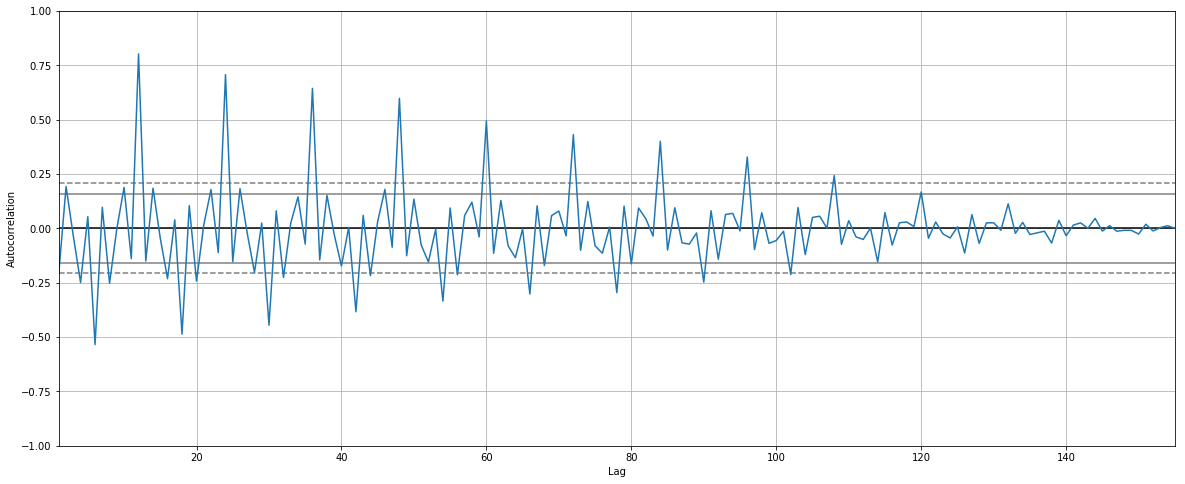

In [113]:
plt.figure(figsize=(20,8))
pd.plotting.autocorrelation_plot(crime_M_diff)

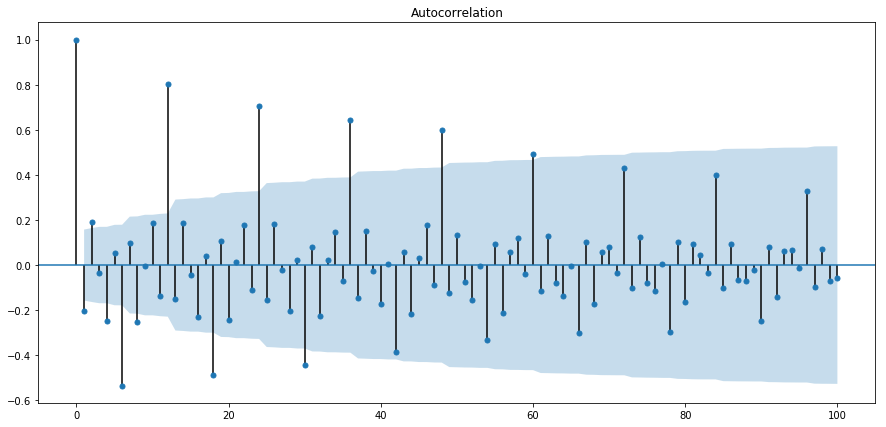

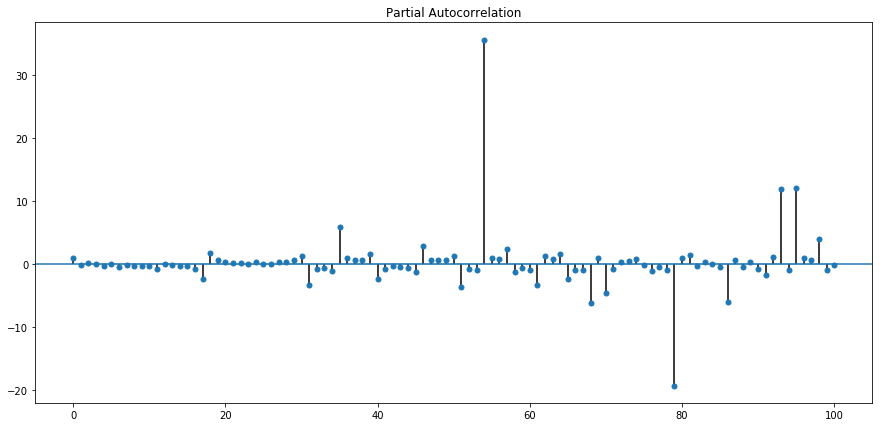

In [136]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams


fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M_diff,ax=ax, lags=100);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M_diff,ax=ax, lags=100);

In [153]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [154]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [185]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(crime_M_diff,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2619.5455055197845
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =2325.1255717883305
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =2237.9824638450973
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2006.7908576310647
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =2239.4044077189756
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =2183.882536794079
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =2046.1550445224136
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2008.790811314713
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2597.494798689585
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =2304.1060614288845
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =2206.220414224871
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1975.4080396167487
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =2227.5121933525884
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =2155.6780411750156
ARIMA (0, 

In [156]:
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1971.5601647875887


In [264]:
mod = sm.tsa.statespace.SARIMAX(crime_M['Count'],  trend='n',order=(0, 1, 2), seasonal_order=(0,1,2,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1100.079
Date:                            Thu, 30 May 2019   AIC                           2210.158
Time:                                    18:14:41   BIC                           2224.972
Sample:                                01-01-2006   HQIC                          2216.178
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3200      0.046     -6.928      0.000      -0.410      -0.229
ma.L2         -0.1462      0.053   

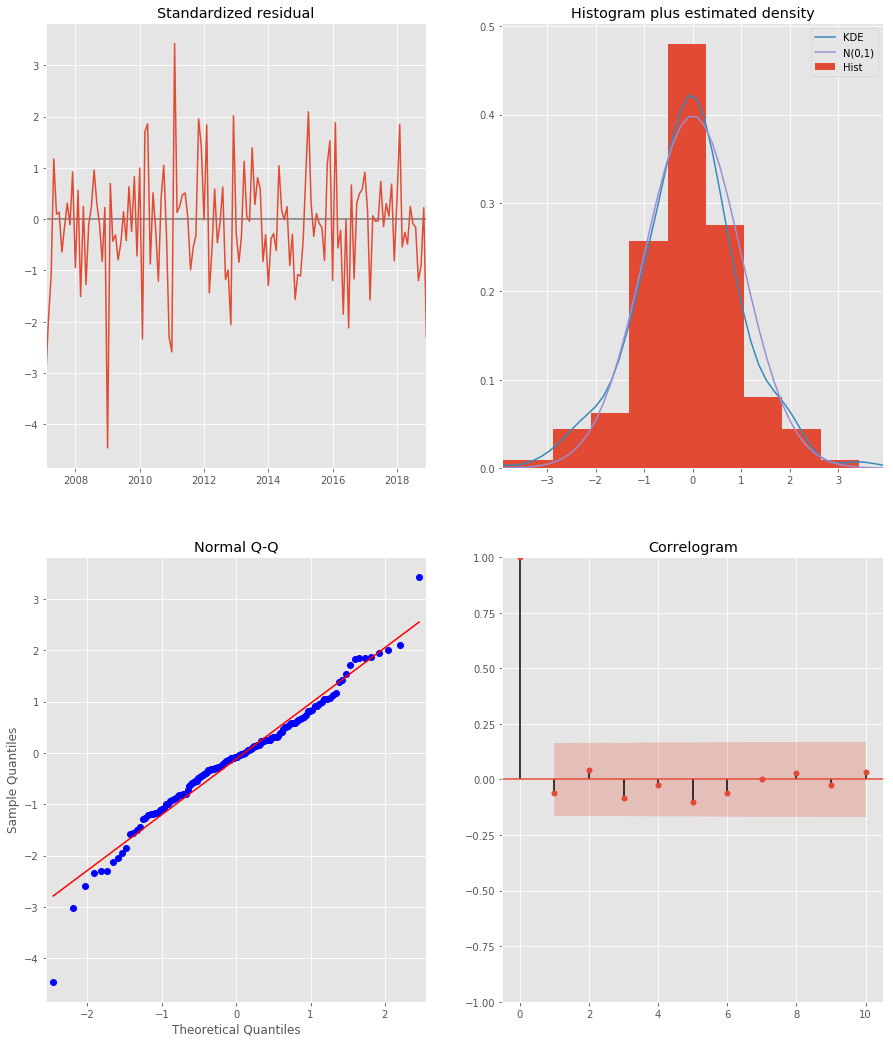

In [265]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()



In [270]:
crime_M['predict_dynamic']= res.predict(start=-12, dynamic=True)
crime_M['predict_ahead']= res.predict(start=-12, dynamic=False)

In [271]:
crime_M.tail(12)

,Count,seasonal_diff,seasonal_diff_first,first_diff,first_diff_season,predict,predict_dynamic,predict_ahead
Month,,,,,,,,
2018-01-01,13022,-406.0,170.0,-956.0,170.0,12842.277678,12842.277678,12842.277678
2018-02-01,11888,421.0,827.0,-1134.0,827.0,10895.189156,10895.189156,11017.413058
2018-03-01,12713,383.0,-38.0,825.0,-38.0,12280.524075,12280.524075,12968.515136
2018-04-01,12919,85.0,-298.0,206.0,-298.0,12653.009808,12653.009808,13039.947493
2018-05-01,14108,-30.0,-115.0,1189.0,-115.0,13997.111315,13997.111315,14339.158700
2018-06-01,14289,155.0,185.0,181.0,185.0,13969.903638,13969.903638,14172.437577
2018-07-01,15205,0.0,-155.0,916.0,-155.0,14930.625994,14930.625994,15246.226297
2018-08-01,15466,-45.0,-45.0,261.0,-45.0,15270.453374,15270.453374,15540.975096
2018-09-01,14024,-592.0,-547.0,-1442.0,-547.0,14364.200172,14364.200172,14589.763580


In [207]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(crime_M_diff,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary())


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  155
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -981.780
Date:                            Thu, 30 May 2019   AIC                           1971.560
Time:                                    17:14:18   BIC                           1982.968
Sample:                                02-01-2006   HQIC                          1976.195
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2970      0.081     -3.665      0.000      -0.456      -0.138
ma.L1         -0.9996      3.700   

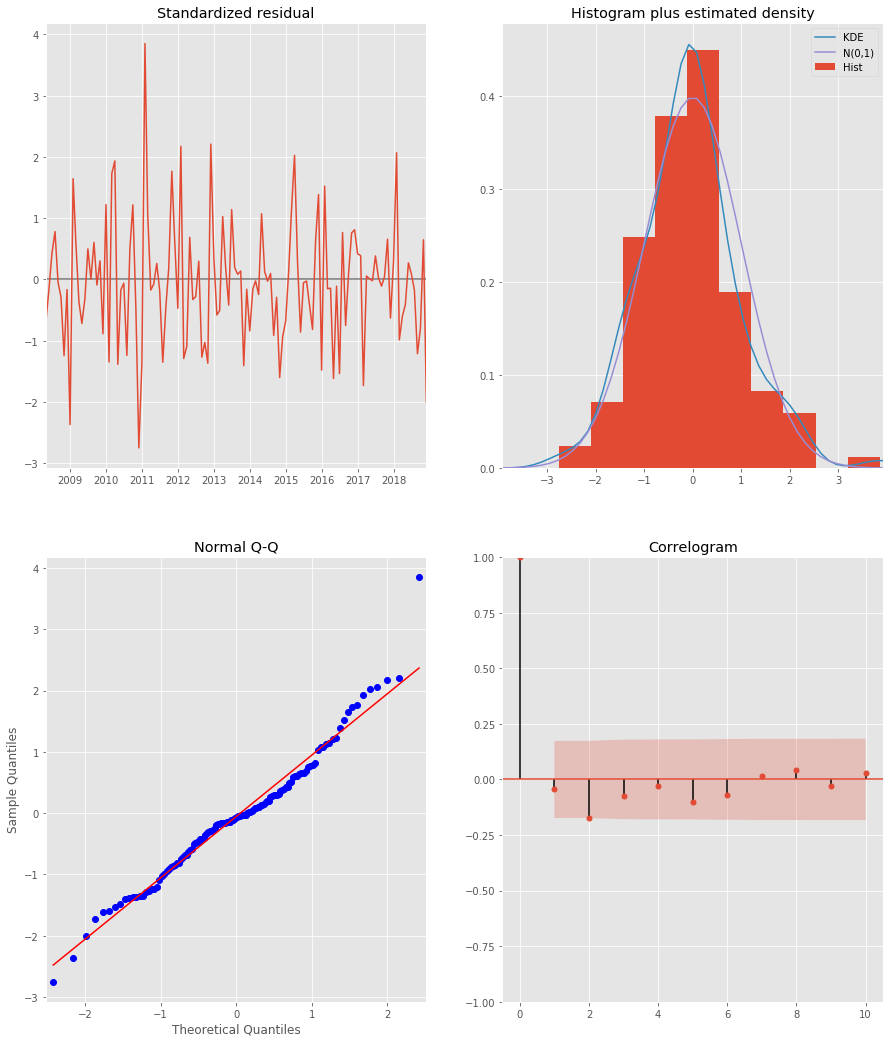

In [197]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

#  KDE line follows closely with the N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). 
#  This is a good indication that the residuals are normally distributed.
# The distribution of residuals (blue dots) are following the linear trend with some slight random pattern but 
# we can consider the residuals as almost normally distributed.

# The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. 
# This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series
# residuals have low correlation with lagged versions of itself.



In [208]:
crime_M

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679
2006-06-01,16607
2006-07-01,17484
2006-08-01,18092
2006-09-01,17266


In [229]:
training_data = crime_M.loc[crime_M.index < "2015-01-01"]
validation_set = crime_M.loc[crime_M.index >= "2015-01-01"]

In [236]:
print(len(training_data))
print(len(validation_set))

108
48


In [ ]:
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [286]:
crime_x = pd.read_csv('final.csv')

In [287]:
crime_x.index = pd.to_datetime(
  crime_x.Month, errors='coerce', infer_datetime_format = True)
crime_x.drop(labels=['Month'], axis=1, inplace=True)



In [288]:
crime_x.head()

,Count,Unem_R,Mean_Temp,Over70,Days
Month,,,,,
2006-01-01,16392,5.1,45.033226,0.0,31
2006-02-01,13101,5.3,40.423214,0.0,28
2006-03-01,15572,5.0,49.034516,1.0,31
2006-04-01,15123,4.6,62.382333,7.0,30
2006-05-01,16679,4.5,69.665806,12.0,31


In [289]:
print(crime_M.shape, crime_x.shape)

(156, 8) (156, 5)


In [290]:
mod = sm.tsa.statespace.SARIMAX(crime_M['Count'], exog=crime_x[['Unem_R', 'Days', 'Mean_Temp']],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1063.587
Date:                            Thu, 30 May 2019   AIC                           2139.174
Time:                                    18:32:21   BIC                           2156.951
Sample:                                01-01-2006   HQIC                          2146.398
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Unem_R        92.8782    122.856      0.756      0.450    -147.916     333.672
Days         550.6265     92.092   

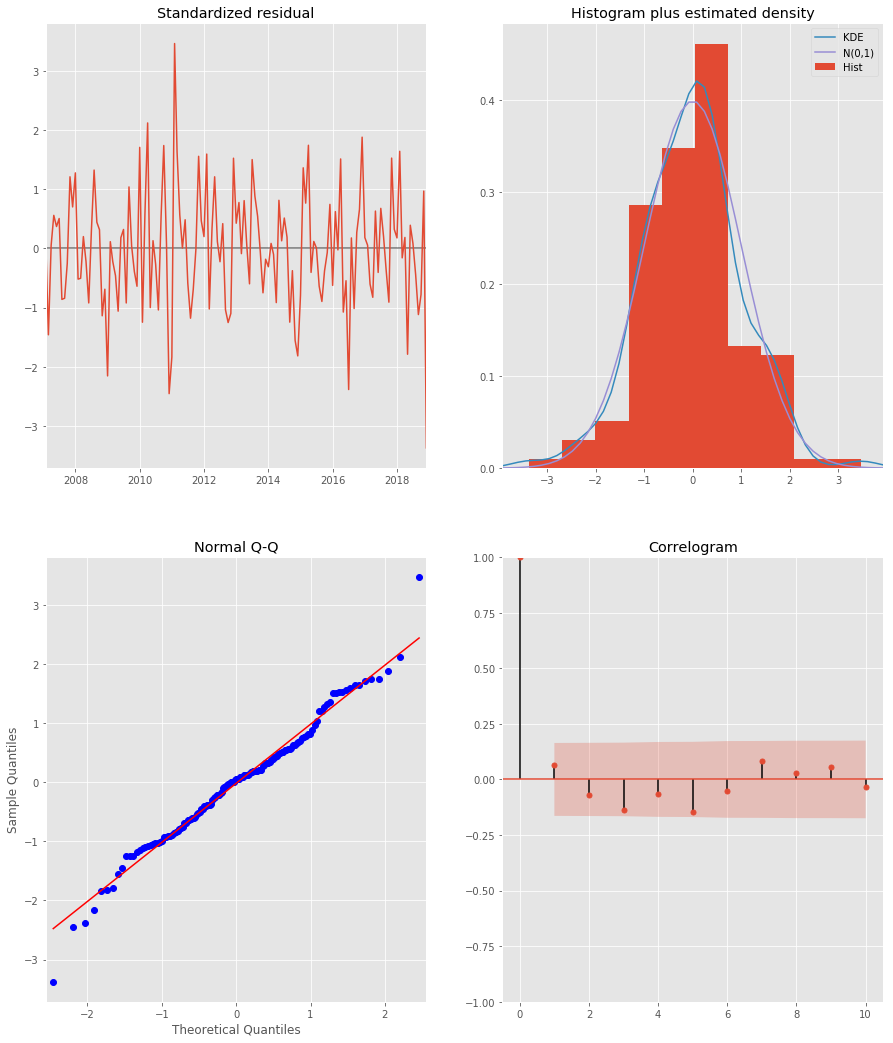

In [293]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [291]:
crime_x['predict_dynamic']= res.predict(start=-12, dynamic=True)
crime_x['predict_ahead']= res.predict(start=-12, dynamic=False)

In [292]:
crime_x.tail(12)

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead
Month,,,,,,,
2018-01-01,13022,5.0,36.406452,0.0,31,12951.290449,12951.290449
2018-02-01,11888,5.1,45.776429,1.0,28,11192.768192,11234.364361
2018-03-01,12713,4.6,44.391935,0.0,31,12350.514172,12776.546924
2018-04-01,12919,4.0,54.862667,2.0,30,12456.534717,12845.190447
2018-05-01,14108,3.7,73.545484,20.0,31,14388.198699,14820.264019
2018-06-01,14289,4.1,77.937667,25.0,30,14119.857819,14133.020834
2018-07-01,15205,4.2,83.967097,31.0,31,15066.026523,15170.928459
2018-08-01,15466,4.0,83.711935,31.0,31,15519.126133,15644.065924
2018-09-01,14024,3.6,75.378000,23.0,30,14449.021335,14469.235514


In [39]:
x_crime.columns

Index(['Count', 'Unem_R', 'Mean_Temp', 'Over70', 'Days', 'Countseason_2nd',
       'Unem_Rseason_2nd', 'Mean_Tempseason_2nd', 'Over70season_2nd',
       'Daysseason_2nd'],
      dtype='object')

In [146]:
x_crime.columns

Index(['Count', 'Unem_R', 'Mean_Temp', 'Over70', 'Days', 'Count_Diff',
       'Unem_R_Diff', 'Mean_Temp_Diff', 'Over70_Diff', 'Days_Diff'],
      dtype='object')

In [206]:
exog = x_crime[['Unem_R', 'Mean_Temp_Diff', 'Days']]

In [129]:
exog.isnull().sum()

Countseason_2nd        13
Unem_R                  0
Mean_Tempseason_2nd    13
Over70season_2nd       13
Days                    0
dtype: int64

In [161]:
mod = sm.tsa.statespace.SARIMAX(crime_M['2007-02':]['Count'], exog=exog['2007-02':],
                                trend='n', order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -984.288
Date:                            Thu, 30 May 2019   AIC                           1982.576
Time:                                    22:41:46   BIC                           2002.649
Sample:                                02-01-2007   HQIC                          1990.732
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Unem_R           150.5631    147.696      1.019      0.308    -138.915     440.041
Mean_Temp_Diff    14.76

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [131]:
crime_M.isnull().sum()

Count          0
Count_diff    13
dtype: int64

In [150]:
x_crime['predict_dynamic']= res.predict(start=-12, dynamic=True)
x_crime['predict_ahead']= res.predict(start=-12, dynamic=False)

In [151]:
sqrt(mean_squared_error(
    x_crime['Count'], x_crime['predict_ahead'].fillna(0)))  / x_crime['Count'].std()

9.53606332540755

In [153]:
x_crime['2018'][['Count', 'predict_dynamic', 'predict_ahead']]

,Count,predict_dynamic,predict_ahead
Month,,,
2018-01-01,13022,12877.899682,12877.899682
2018-02-01,11888,10749.095908,10842.872334
2018-03-01,12713,12536.164433,13311.800169
2018-04-01,12919,12503.416171,12889.394197
2018-05-01,14108,14178.781337,14584.064313
2018-06-01,14289,13950.089607,14045.784980
2018-07-01,15205,14992.338781,15246.242864
2018-08-01,15466,15275.319807,15502.383003
2018-09-01,14024,14384.774623,14588.180626


In [135]:
x_crime['Count'].std()

1546.550153020086

In [136]:
np.abs(x_crime['2018']['Count']
       - x_crime['2018']
       ['predict_dynamic']).sum()/len(x_crime['2018'])/x_crime['2018']['Count'].std()

0.3218852238706624

In [137]:
np.abs(x_crime['2018']['Count']
       - x_crime['2018']
       ['predict_ahead']).sum()/len(x_crime['2018'])/x_crime['2018']['Count'].std()

0.2780475319520046

In [121]:
x_crime['2018']['Count'].std()

1098.5952049059856

15149.25
15335.0
1546.550153020086


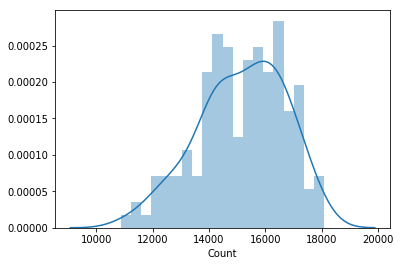

In [94]:
print(x_crime['Count'].mean())
print(x_crime['Count'].median())
print(x_crime['Count'].std())
sns.distplot(x_crime['Count'], bins = 20)

In [ ]:
diff = x_crime[col].diff(periods=1)
x_crime['{}season_2nd'.format(col)] = diff.diff(periods=12)

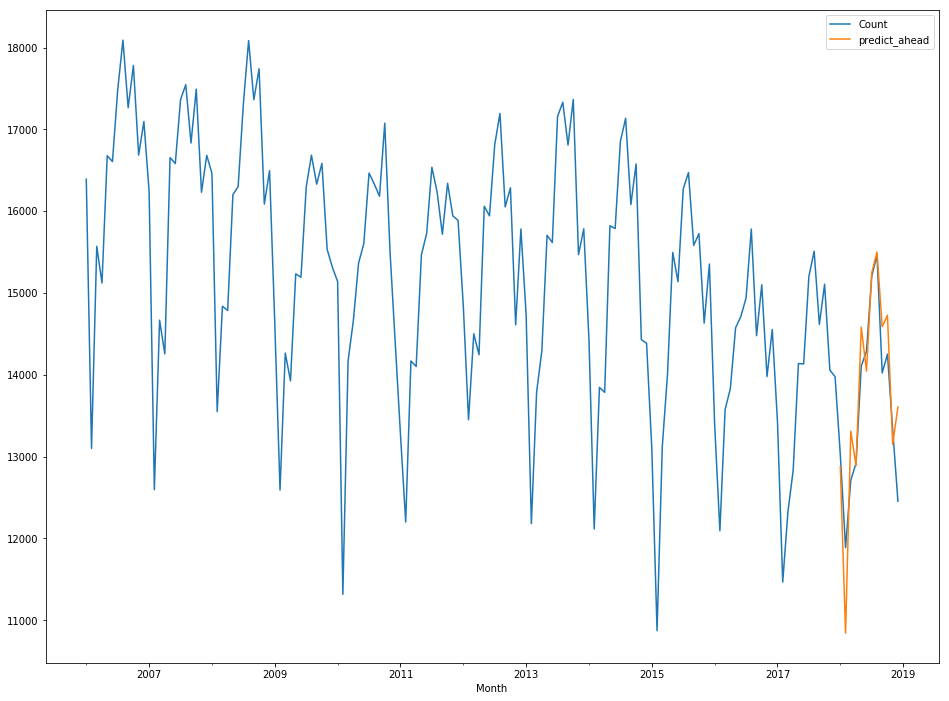

In [156]:
# monthly_sales['forecast'] = res.predict(start = 54, end= 72, dynamic= False)  
x_crime[['Count', 'predict_ahead']].plot(figsize=(16, 12)) 

In [ ]:
x_crime['predict_dynamic']= res.predict(start=-12, dynamic=True)

In [ ]:
plt.x

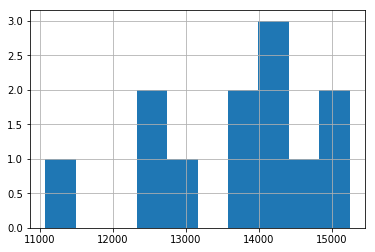

In [141]:
x_crime['predict_dynamic'].hist()

In [154]:
y_forecasted = x_crime.predict_dynamic
y_truth = x_crime.Count
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 384167.14


In [155]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 619.81


In [166]:
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= x_crime.columns)
monthly_sales = pd.concat([x_crime, future])

In [170]:
monthly_sales['forecast'] = res.predict(start = 156, end = 168, dynamic= True)  
monthly_sales[['Count', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 
# plt.savefig('ts_predict_future.png', bbox_inches='tight')

ValueError: Out-of-sample forecasting in a model with a regression component requires additional exogenous values via the `exog` argument.

In [175]:
mod = sm.tsa.statespace.SARIMAX(x_crime['Unem_R'],
                                trend='n', order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                             Unem_R   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  13.119
Date:                            Thu, 30 May 2019   AIC                            -20.239
Time:                                    23:08:29   BIC                            -11.350
Sample:                                01-01-2006   HQIC                           -16.627
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0722      0.086      0.844      0.399      -0.095       0.240
ma.S.L12      -0.8511      0.105   

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [160]:
future = x_crime(index = x_crime.index, columns = x_crime.columns)


TypeError: 'DataFrame' object is not callable

In [ ]:
for col in x_crime.columns:
    diff = x_crime[col].diff(periods=1)
    x_crime['{}_Diff'.format(col)] = diff.diff(periods=12)

In [173]:
x_crime

,Count,Unem_R,Mean_Temp,Over70,Days,Count_Diff,Unem_R_Diff,Mean_Temp_Diff,Over70_Diff,Days_Diff,predict_dynamic,predict_ahead
Month,,,,,,,,,,,,
2006-01-01,16392,5.1,45.033226,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,13101,5.3,40.423214,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,15572,5.0,49.034516,1.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,15123,4.6,62.382333,7.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,16679,4.5,69.665806,12.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,16607,4.5,76.862000,22.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,17484,4.8,84.831290,31.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,18092,4.4,81.500968,28.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,17266,4.2,71.958000,17.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mod = sm.tsa.statespace.SARIMAX(x_crime['Unem_R'],
                                trend='n', order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

In [176]:
start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= x_crime.columns)
unemp = pd.concat([x_crime, future])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


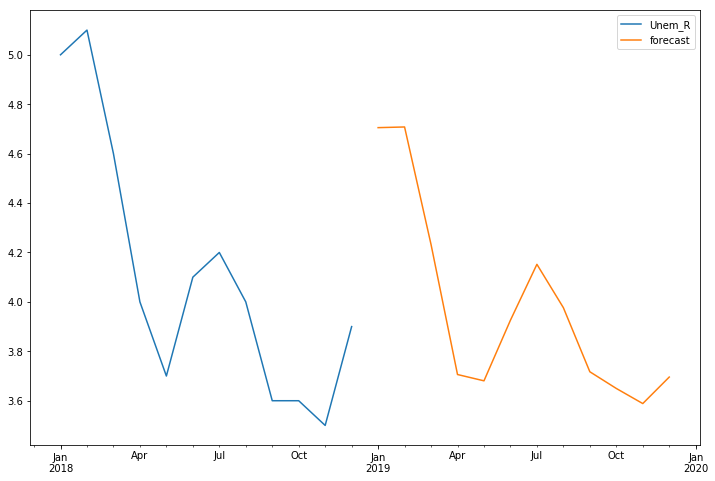

In [179]:
unemp['forecast'] = res.predict(start = 156, end = 168, dynamic= True)  
unemp[['Unem_R', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

In [201]:
unemp.Unem_R['2019':] = unemp.forecast['2019':]
unemp.Days['2019'] = unemp.Days['2018']
unemp.Mean_Temp_Diff['2019'] = unemp.Mean_Temp_Diff['2018']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
unemp.drop(['Count', 'Mean_Temp', 'Over70', 'Count_Diff',
       'Unem_R_Diff',  'Over70_Diff', 'Days_Diff',
       'predict_dynamic', 'predict_ahead', 'forecast'], axis = 1, inplace = True)

In [203]:
unemp.tail(12)

,Count,Unem_R,Mean_Temp,Over70,Days,Count_Diff,Unem_R_Diff,Mean_Temp_Diff,Over70_Diff,Days_Diff,predict_dynamic,predict_ahead,forecast
2019-01-01,NaN,0.543002,NaN,NaN,31,NaN,NaN,-0.298710,NaN,NaN,NaN,NaN,0.543002
2019-02-01,NaN,1.224252,NaN,NaN,28,NaN,NaN,2.999850,NaN,NaN,NaN,NaN,1.224252
2019-03-01,NaN,-0.773713,NaN,NaN,31,NaN,NaN,1.524021,NaN,NaN,NaN,NaN,-0.773713
2019-04-01,NaN,-0.180494,NaN,NaN,30,NaN,NaN,-8.770806,NaN,NaN,NaN,NaN,-0.180494
2019-05-01,NaN,1.009199,NaN,NaN,31,NaN,NaN,15.282097,NaN,NaN,NaN,NaN,1.009199
2019-06-01,NaN,-0.174402,NaN,NaN,30,NaN,NaN,-7.802097,NaN,NaN,NaN,NaN,-0.174402
2019-07-01,NaN,-0.102393,NaN,NaN,31,NaN,NaN,2.421774,NaN,NaN,NaN,NaN,-0.102393
2019-08-01,NaN,0.315523,NaN,NaN,31,NaN,NaN,2.450323,NaN,NaN,NaN,NaN,0.315523
2019-09-01,NaN,0.160013,NaN,NaN,30,NaN,NaN,-5.123763,NaN,NaN,NaN,NaN,0.160013
2019-10-01,NaN,-0.238104,NaN,NaN,31,NaN,NaN,-6.127527,NaN,NaN,NaN,NaN,-0.238104


In [195]:
b = x_crime['2007-02':]['Mean_Temp_Diff']

In [197]:
mod = sm.tsa.statespace.SARIMAX(x_crime['2007-02':]['Mean_Temp_Diff'],
                                trend='n', order=(0, 1, 1), seasonal_order=(0,1,1,12), 
                                enforce_invertibility = False)
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     Mean_Temp_Diff   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -439.168
Date:                            Thu, 30 May 2019   AIC                            884.337
Time:                                    23:20:00   BIC                            892.939
Sample:                                02-01-2007   HQIC                           887.832
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    959.184     -0.001      0.999   -1880.967    1878.967
ma.S.L12      -1.0000   5082.204   

In [216]:
unemp['2007-02':'2018']

,Unem_R,Days,Mean_Temp_Diff
2007-02-01,4.9,28,-3.903007
2007-03-01,4.4,31,7.025265
2007-04-01,4.2,30,-6.156194
2007-05-01,4.2,31,10.396194
2007-06-01,4.5,30,-1.766527
2007-07-01,4.9,31,-5.266699
2007-08-01,4.5,31,2.845161
2007-09-01,4.5,30,5.346538
2007-10-01,4.4,31,2.199269
2007-11-01,4.4,30,-13.576935


In [221]:
crime_M['2007-02':]

,Count,Count_diff
Month,,
2007-02-01,12597,-353.0
2007-03-01,14669,-399.0
2007-04-01,14256,36.0
2007-05-01,16656,844.0
2007-06-01,16583,-1.0
2007-07-01,17365,-95.0
2007-08-01,17547,-426.0
2007-09-01,16834,113.0
2007-10-01,17493,143.0


In [243]:
unemp.columns

Index(['Unem_R', 'Days', 'Mean_Temp_Diff', 'Crime_count'], dtype='object')

In [245]:
exog = unemp['2007-02':'2018'][['Unem_R', 'Days', 'Mean_Temp_Diff']]

In [232]:
unemp.Days = unemp.Days.astype('int64')

In [291]:
unemp['2019']['Crime_count'] = np.nan

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [293]:
unemp['2018']

,Unem_R,Days,Mean_Temp_Diff,Crime_count,forecast
2018-01-01,5.0,31,-0.298710,13022.0,NaN
2018-02-01,5.1,28,2.999850,11888.0,NaN
2018-03-01,4.6,31,1.524021,12713.0,NaN
2018-04-01,4.0,30,-8.770806,12919.0,NaN
2018-05-01,3.7,31,15.282097,14108.0,NaN
2018-06-01,4.1,30,-7.802097,14289.0,NaN
2018-07-01,4.2,31,2.421774,15205.0,NaN
2018-08-01,4.0,31,2.450323,15466.0,NaN
2018-09-01,3.6,30,-5.123763,14024.0,NaN
2018-10-01,3.6,31,-6.127527,14254.0,NaN


In [236]:
unemp['Crime_count'] = x_crime.Count

In [255]:
mod = sm.tsa.statespace.SARIMAX(unemp['2007-02':'2018']['Crime_count'], exog=exog,
                                trend='n',
                                order=(0, 1, 1),
                                seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        Crime_count   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -984.626
Date:                            Thu, 30 May 2019   AIC                           1981.252
Time:                                    23:53:01   BIC                           1998.458
Sample:                                02-01-2007   HQIC                          1988.244
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Unem_R           257.3306    144.660      1.779      0.075     -26.198     540.860
Days             298.76

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [279]:
mod = sm.tsa.statespace.SARIMAX(unemp['2007-02':'2018']['Crime_count'], exog=exog,
                                trend='n',
                                order=(0, 1, 1),
                                seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        Crime_count   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -984.626
Date:                            Fri, 31 May 2019   AIC                           1981.252
Time:                                    00:01:32   BIC                           1998.458
Sample:                                02-01-2007   HQIC                          1988.244
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Unem_R           257.3306    144.660      1.779      0.075     -26.198     540.860
Days             298.76

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [266]:
start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= unemp.columns)
pred = pd.concat([unemp, future])

In [276]:
unemp['2019']['Crime_count'] = unemp['2019']['forecast']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [268]:
pred[156:]

,Unem_R,Days,Mean_Temp_Diff,Crime_count
2019-01-01,0.543002,31,-0.298710,NaN
2019-02-01,1.224252,28,2.999850,NaN
2019-03-01,-0.773713,31,1.524021,NaN
2019-04-01,-0.180494,30,-8.770806,NaN
2019-05-01,1.009199,31,15.282097,NaN
2019-06-01,-0.174402,30,-7.802097,NaN
2019-07-01,-0.102393,31,2.421774,NaN
2019-08-01,0.315523,31,2.450323,NaN
2019-09-01,0.160013,30,-5.123763,NaN
2019-10-01,-0.238104,31,-6.127527,NaN


In [280]:
unemp.tail(13)

,Unem_R,Days,Mean_Temp_Diff,Crime_count,forecast
2018-12-01,3.900000,31,9.191097,12455.000000,NaN
2019-01-01,0.543002,31,-0.298710,11548.702544,11548.702544
2019-02-01,1.224252,28,2.999850,9941.644492,9941.644492
2019-03-01,-0.773713,31,1.524021,11118.678388,11118.678388
2019-04-01,-0.180494,30,-8.770806,11442.486741,11442.486741
2019-05-01,1.009199,31,15.282097,12689.537138,12689.537138
2019-06-01,-0.174402,30,-7.802097,12744.593267,12744.593267
2019-07-01,-0.102393,31,2.421774,13643.561090,13643.561090
2019-08-01,0.315523,31,2.450323,13987.681695,13987.681695
2019-09-01,0.160013,30,-5.123763,12834.546705,12834.546705


In [278]:
unemp.tail(12)

,Unem_R,Days,Mean_Temp_Diff,Crime_count,forecast
2019-01-01,0.543002,31,-0.298710,11548.702544,11548.702544
2019-02-01,1.224252,28,2.999850,9941.644492,9941.644492
2019-03-01,-0.773713,31,1.524021,11118.678388,11118.678388
2019-04-01,-0.180494,30,-8.770806,11442.486741,11442.486741
2019-05-01,1.009199,31,15.282097,12689.537138,12689.537138
2019-06-01,-0.174402,30,-7.802097,12744.593267,12744.593267
2019-07-01,-0.102393,31,2.421774,13643.561090,13643.561090
2019-08-01,0.315523,31,2.450323,13987.681695,13987.681695
2019-09-01,0.160013,30,-5.123763,12834.546705,12834.546705
2019-10-01,-0.238104,31,-6.127527,13213.424912,13213.424912


In [318]:
sns.set_style('darkgrid')

In [319]:
exog_test = unemp['2019':][['Unem_R', 'Days', 'Mean_Temp_Diff']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'Forcasting For 2019')

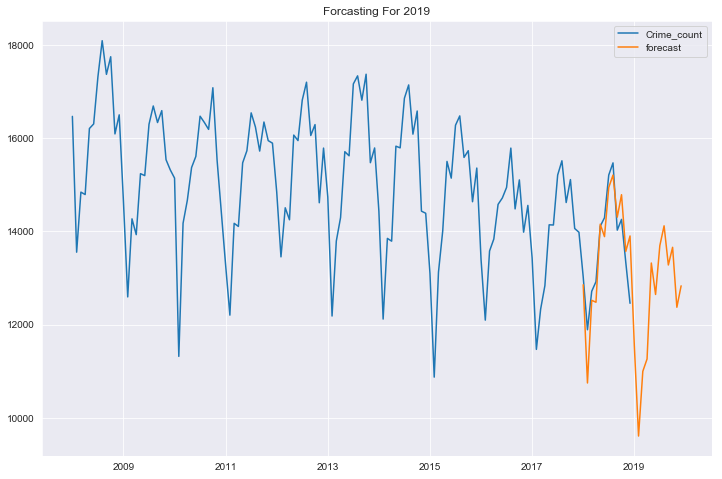

In [323]:
unemp['forecast'] = res.predict(start = '2018-01-01', end = '2019-12-01', dynamic= True, exog=exog_test)
unemp[['Crime_count', 'forecast']].ix[24:].plot(figsize=(12, 8))
plt.title('Forcasting For 2019')

In [299]:
unemp.shape

(168, 5)

In [305]:
unemp.forecast.isnull().sum()

156

In [249]:
pred['2019']['forecast']

KeyError: 'forecast'